In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *


In [15]:
def missed_alleles_per_ancestry(pre,gs):
    groupscsv = "../datasets/SraRunTableD2.txt"
    groups = pd.read_csv(groupscsv)
    
    results = []

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        gs_final = gs_final.iloc[: ,:]
        

        ret = get_inaccurate_alleles(pre,gs_final)
        results.append(ret)

    yorubaresult = results[4]
    europeanresult = sum_euro_groups(results[1:4])

    return yorubaresult, europeanresult

In [16]:
data = list()
tools=["hlaforest","optitype","phlat","seq2hla","rna2hla","arcas","hlavbseq","hlahd"]

yoruba_missed_alleles = []
europe_missed_alleles = []

for t in tools:
    gs=pd.read_csv("../datasets/2_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d2.csv")
        
    results = missed_alleles_per_ancestry(pre,gs)
    
    for i in results[0]:
        yoruba_missed_alleles.append(i)
    for i in results[1]:
        europe_missed_alleles.append(i)
    



In [17]:
ycounts = Counter(yoruba_missed_alleles)
ecounts = Counter(europe_missed_alleles)

print(ycounts)
print(ecounts)

Counter({'DQB1*02:01': 55, 'DQB1*06:03': 34, 'DQB1*05:01': 31, 'DQB1*06:02': 30, 'DRB1*11:04': 25, 'DQB1*05:02': 21, 'DRB1*15:03': 19, 'DQB1*06:05': 16, 'DRB1*13:01': 16, 'B*53:01:00': 15, 'DQB1*04:02': 15, 'C*04:01': 14, 'DRB1*13:03': 14, 'DRB1*08:04': 13, 'B*42:01:00': 12, 'DRB1*13:02': 12, 'DRB1*03:01': 12, 'B*52:01:00': 11, 'B*35:01:00': 10, 'DRB1*14:01': 9, 'DRB1*07:01': 9, 'DQB1*06:04': 8, 'DRB1*01:01': 8, 'A*24:24:00': 6, 'B*41:04:00': 6, 'DRB1*03:02': 6, 'B*15:10': 5, 'DRB1*11:01': 5, 'C*07:01': 5, 'A*30:02:00': 5, 'A*23:01': 4, 'B*51:01:00': 4, 'DQB1*03:01': 4, 'B*07:02': 4, 'DRB1*12:01': 4, 'DRB1*13:35': 4, 'B*18:01': 3, 'DQB1*05:03': 3, 'A*02:01': 3, 'A*03:01': 3, 'B*15:03': 2, 'B*42:02:00': 2, 'C*02:02': 2, 'DRB1*01:02': 2, 'A*29:02:00': 2, 'B*13:02': 2, 'C*17:01': 2, 'B*35:01': 1, 'C*01:02': 1, 'A*26:01:00': 1, 'A*02:05': 1, 'C*07:02': 1, 'A*30:01:00': 1, 'A*01:01': 1})
Counter({'DQB1*02:01': 334, 'DRB1*15:01': 196, 'DQB1*03:01': 180, 'DQB1*03:02': 151, 'DRB1*01:01': 145, 

In [18]:
allele_intersection = list(set(ycounts.keys()) & set(ecounts.keys()))

intersection = []

for allele in allele_intersection:
    intersection.append([allele,ycounts[allele],ecounts[allele],ecounts[allele]+ycounts[allele]])

df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['total'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele  yoruba  Europe  total
9   DQB1*02:01      55     334    389
25  DQB1*03:01       4     180    184
16  DRB1*01:01       8     145    153
10  DQB1*05:01      31      78    109
17  DQB1*04:02      15      81     96
3   DQB1*06:02      30      63     93
11  DRB1*03:01      12      71     83
27     C*04:01      14      54     68
6      A*02:01       3      61     64
8   DRB1*07:01       9      52     61
28  DRB1*11:04      25      31     56
5   DRB1*11:01       5      48     53
22  DRB1*13:01      16      28     44
19  DQB1*06:03      34      10     44
18  DQB1*05:02      21      11     32
14     B*35:01       1      29     30
21  DRB1*13:02      12      16     28
23     B*07:02       4      23     27
4   DRB1*14:01       9      17     26
26  DRB1*13:03      14       9     23
31     A*03:01       3      20     23
13     C*07:01       5      16     21
7      A*01:01       1      18     19
24  DQB1*05:03       3      13     16
2      B*13:02       2      11     13
1   DRB1*01:

In [19]:
#normalize ot sample size for fair comparison for africa vs europe
intersection = np.array(intersection)   
intersection[:,1] = intersection[:,1].astype(float)/67
intersection[:,2] = intersection[:,2].astype(float)/423
intersection[:,3] = intersection[:,3].astype(float)/490


df = pd.DataFrame (intersection, columns = ['allele','yoruba','Europe','total'])
df = df.sort_values(by=['yoruba'],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        allele                yoruba                 Europe  \
9   DQB1*02:01    0.8208955223880597      0.789598108747045   
19  DQB1*06:03    0.5074626865671642    0.02364066193853428   
10  DQB1*05:01    0.4626865671641791    0.18439716312056736   
3   DQB1*06:02   0.44776119402985076    0.14893617021276595   
28  DRB1*11:04     0.373134328358209    0.07328605200945626   
18  DQB1*05:02   0.31343283582089554   0.026004728132387706   
22  DRB1*13:01   0.23880597014925373    0.06619385342789598   
17  DQB1*04:02   0.22388059701492538    0.19148936170212766   
26  DRB1*13:03     0.208955223880597    0.02127659574468085   
27     C*04:01     0.208955223880597     0.1276595744680851   
21  DRB1*13:02    0.1791044776119403   0.037825059101654845   
11  DRB1*03:01    0.1791044776119403    0.16784869976359337   
8   DRB1*07:01   0.13432835820895522    0.12293144208037825   
4   DRB1*14:01   0.13432835820895522    0.04018912529550828   
16  DRB1*01:01   0.11940298507462686    0.3427895981087

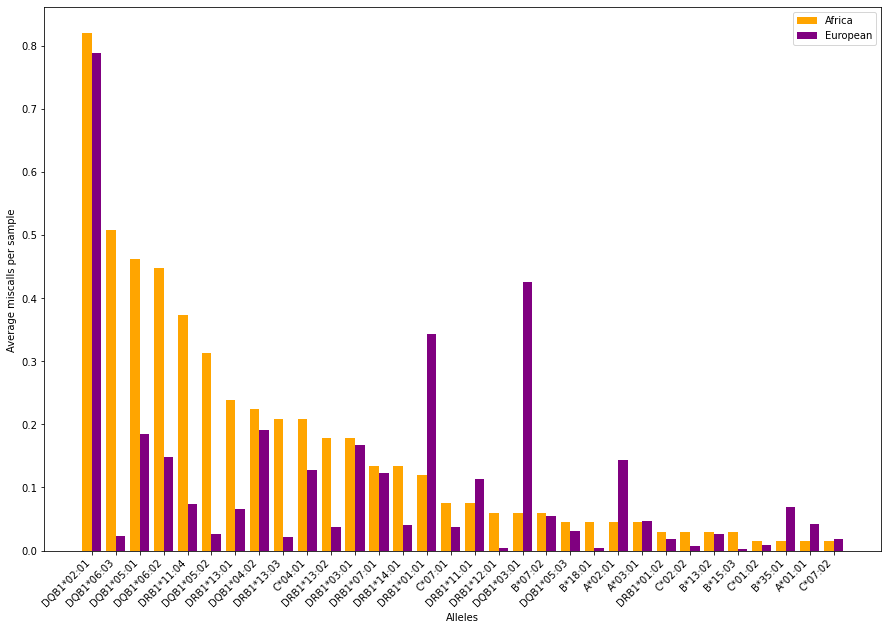

In [20]:
allele = np.array(df['allele'])
yoruba = np.array(df['yoruba'])
europe = np.array(df['Europe'])
total = np.array(df['total'])  

xaxis = np.arange(len(allele))
 
plt.figure(figsize = (15,10))

plt.bar(xaxis - 0.2, yoruba.astype(float), 0.4,color='orange')
plt.bar(xaxis + 0.2, europe.astype(float), 0.4, color='purple')
plt.legend(["Africa","European"])
plt.xticks(xaxis,allele,rotation=45, ha='right')
plt.xlabel("Alleles")
plt.ylabel("Average miscalls per sample ")

plt.show()

In [21]:
#yoruban: avg miscalls/sample
np.average(yoruba.astype(float))

0.1637126865671642

In [22]:
#european: avg miscalls/sample
np.average(europe.astype(float))

0.1069001182033097